# TP 1 : Méthodes de Signal Avancées Annulation d’Écho Acoustique

In [10]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt

## I. Implémentation de l'algorithme LMS

### I.1 Générations de signaux tests

In [11]:

ROOT = Path.cwd().parents[0]
sys.path.append(str(ROOT / "src"))

from importlib import reload
import signals_utils

reload(signals_utils)
from signals_utils import generate_test_signals


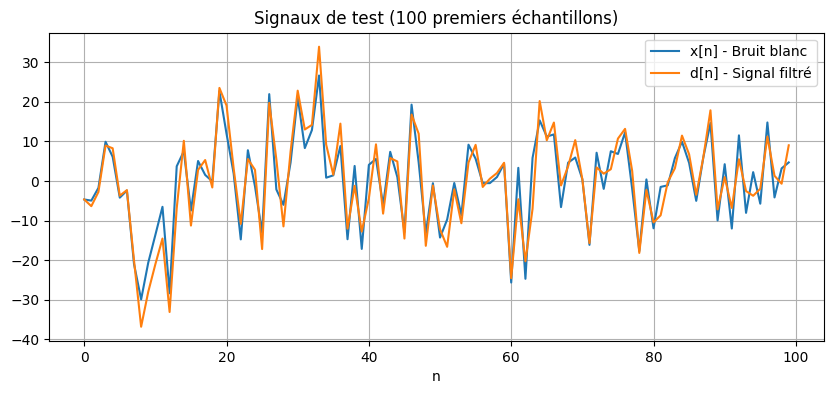

Réponse impulsionnelle utilisée : [ 1.   0.3 -0.1  0.2]


In [12]:
# Génération des signaux
x, d, h = generate_test_signals(N=500, variance = 100)

# Visualisation
plt.figure(figsize=(10, 4))
plt.plot(x[:100], label="x[n] - Bruit blanc")
plt.plot(d[:100], label="d[n] - Signal filtré")
plt.title("Signaux de test (100 premiers échantillons)")
plt.xlabel("n")
plt.legend()
plt.grid(True)
plt.show()

print("Réponse impulsionnelle utilisée :", h)

### I.2 Mise en oeuvre de l'algorithme LMS